# Question 1

In [1]:
import pandas as pd #Step 1. Import the necessary libraries
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|') #Step 2. Import the dataset Step 3. Assign it to a variable called users
users.head()  

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [34]:
users[["age", "occupation"]].groupby("occupation").mean() #Step 4. Discover what is the mean age per occupation

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [37]:
UsersMale = users[users['gender'] == 'M']
maleCount=UsersMale.groupby(['occupation','gender'])['gender'].count()
totalCount=users.groupby(['occupation'])['gender'].count()
maleRatio=(maleCount/totalCount)
maleRatio.sort_values(ascending=False)#Step 5. Discover the Male ratio per occupation and sort it from the most to the least

occupation     gender
doctor         M         1.000000
engineer       M         0.970149
technician     M         0.962963
retired        M         0.928571
programmer     M         0.909091
executive      M         0.906250
scientist      M         0.903226
entertainment  M         0.888889
lawyer         M         0.833333
salesman       M         0.750000
educator       M         0.726316
student        M         0.693878
other          M         0.657143
marketing      M         0.615385
writer         M         0.577778
none           M         0.555556
administrator  M         0.544304
artist         M         0.535714
librarian      M         0.431373
healthcare     M         0.312500
homemaker      M         0.142857
Name: gender, dtype: float64

In [4]:
mmAgeData=users.groupby('occupation').agg({'age': ['min', 'max']})#Step 6. For each occupation, calculate the minimum and maximum ages
mmAgeData

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [5]:
users.groupby(['occupation','gender'])['age'].mean()#Step 7. For each combination of occupation and sex, calculate the mean age

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [6]:
#Step 8. For each occupation present the percentage of women and men
Count1=users.groupby(['occupation','gender'])['gender'].count()
totalCount1=users.groupby(['occupation'])['gender'].count()
finalOutput1=((Count1/totalCount1)*100)
finalOutput1

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

In [2]:
import pandas as pd #Step 1. Import the necessary libraries
import random
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12 #Step 2. Import the dataset from this address Step 3. Assign it to a variable called euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [3]:
euro12["Goals"]#Step 4. Select only the Goal column

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [4]:
teamCount = euro12["Team"].count() #Step 5. How many team participated in the Euro2012?
teamCount

16

In [5]:
columnsCount=euro12.shape[1]#Step 6. What is the number of columns in the dataset?
columnsCount

35

In [6]:
discipline=pd.DataFrame({'Team':euro12['Team'], 'Yellow Cards': euro12['Yellow Cards'],'Red Cards': euro12['Red Cards']})
discipline#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [7]:
sortByRed=discipline.sort_values("Red Cards")
sortByYellow=sortByRed.sort_values("Yellow Cards")
sortByYellow#Step 8. Sort the teams by Red Cards, then to Yellow Cards

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
11,Republic of Ireland,6,1
1,Czech Republic,7,0
14,Sweden,7,0


In [8]:
mean=sortByYellow.groupby(['Team']).mean("Yellow Cards")#Step 9. Calculate the mean Yellow Cards given per Team
mean

,Yellow Cards,Red Cards
Team,,
Croatia,9.0,0.0
Czech Republic,7.0,0.0
Denmark,4.0,0.0
England,5.0,0.0
France,6.0,0.0
Germany,4.0,0.0
Greece,9.0,1.0
Italy,16.0,0.0
Netherlands,5.0,0.0


In [9]:
euro12["Team"][euro12.Goals>6] #Step 10. Filter teams that scored more than 6 goals

5     Germany
13      Spain
Name: Team, dtype: object

In [10]:
euro12.loc[euro12['Team'].str.startswith('G'), 'Team']#Step 11. Select the teams that start with G

5    Germany
6     Greece
Name: Team, dtype: object

In [11]:
euro12.head(7)#Step 12. Select the first 7 columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [12]:
euro12.iloc[:-3,:]#Step 13. Select all columns except the last 3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [13]:
df = euro12[(euro12.Team == "England") | (euro12.Team == "Italy") | (euro12.Team == "Russia")]
df[["Team","Shooting Accuracy"]]# Step 14 Present only the Shooting Accuracy from England, Italy and Russia]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [19]:
import pandas as pd #Step 1. Import the necessary libraries
import random
Series1 = pd.Series(random.randint(1, 4) for _ in range(100))#Step 2. Create 3 different Series, each of length 100
Series2 = pd.Series(random.randint(1, 2) for _ in range(100))
Series3 = pd.Series(random.randint(10000, 30000) for _ in range(100))
dataframe = pd.concat([Series1, Series2, Series3], axis = 1)#3. Create a DataFrame by joinning the Series by column
dataframe

,0,1,2
0,1,2,29966
1,1,2,13304
2,3,1,13993
3,4,1,15607
4,1,1,26148
...,...,...,...
95,4,1,15729
96,3,1,19301
97,1,2,12532
98,1,1,26000


In [20]:
dataframe.columns = ["bedrs", "bathrs", "price_sqr_meter"]#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
dataframe

,bedrs,bathrs,price_sqr_meter
0,1,2,29966
1,1,2,13304
2,3,1,13993
3,4,1,15607
4,1,1,26148
...,...,...,...
95,4,1,15729
96,3,1,19301
97,1,2,12532
98,1,1,26000


In [39]:
bigcolumn = pd.concat([Series1, Series2, Series3])#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn

0         1
1         1
2         3
3         4
4         1
      ...  
95    15729
96    19301
97    12532
98    26000
99    14409
Length: 300, dtype: int64

In [40]:
len(bigcolumn)#Step 6

300

In [41]:
bigcolumn.reset_index(drop=True)#Step 7. Reindex the DataFrame so it goes from 0 to 299

0          1
1          1
2          3
3          4
4          1
       ...  
295    15729
296    19301
297    12532
298    26000
299    14409
Length: 300, dtype: int64

# Question 4

In [46]:
import pandas as pd #Step 1. Import the necessary libraries
import datetime

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data" #Step 2. Import the dataset from the attached file wind.txt
data = pd.read_csv(url, sep="\s+", parse_dates=[[0,1,2]]) #Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [59]:
def date_time(d):
    year = d.year - 100 if d.year > 2022 else d.year
    return datetime.date(year, d.month, d.day)
    
data['Yr_Mo_Dy']  = data['Yr_Mo_Dy'].apply(date_time)#Step 4.Create a function to fix it and apply it.

data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [60]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])#Step 5. Set the right dates as the index. 
data = data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [61]:
data.isnull().values.ravel().sum()#Step 6. Compute how many values are missing for each location over the entire record.

31

In [62]:
data.notnull().sum().sum()#Step 7. Compute how many non-missing values there are in total.

78857

In [63]:
data.mean().mean()#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

10.227982360836924

In [64]:
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std dev']=data.std()#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations
loc_stats

,min,max,mean,std dev
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [65]:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis = 1)
day_stats['max'] = data.max(axis = 1) 
day_stats['mean'] = data.mean(axis = 1) 
day_stats['std dev'] = data.std(axis = 1)#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations

day_stats.head()

,min,max,mean,std dev
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [32]:
data.loc[data.index.month == 1].mean()#Step 11. Find the average windspeed in January for each location.

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [66]:
yearly = data.resample('Y').mean()#Step 12. Downsample the record to a yearly frequency for each location.
yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [69]:
data.groupby(data.index.to_period('M')).mean()#Step 13. Downsample the record to a monthly frequency for each location.

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [71]:
data.groupby(data.index.to_period('W')).mean()#Step 14. Downsample the record to a weekly frequency for each location.

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [72]:
data.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Yr_Mo_Dy', length=6574)

# Question 5

In [74]:
import pandas as pd#Step 1. Import the necessary libraries
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')#Step 2. Import the dataset from this address.Step 3. Assign it to a variable called chipo.
chipo.head(10)#Step 4. See the first 10 entries

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [75]:
chipo.shape[0]#Step 5. What is the number of observations in the dataset?

4622

In [76]:
chipo.shape[1]#Step 6. What is the number of columns in the dataset?

5

In [77]:
chipo.columns#Step 7. Print the name of all the columns.

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [78]:
chipo.index#Step 8. How is the dataset indexed?

RangeIndex(start=0, stop=4622, step=1)

In [79]:
chipo.item_name.value_counts().head(1)#Step 9. Which was the most-ordered item?

Chicken Bowl    726
Name: item_name, dtype: int64

In [81]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)#Step 10. For the most-ordered item, how many items were ordered?

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [83]:
chipo.groupby("choice_description").sum().sort_values('quantity',ascending=False).head(1)#Step 11. What was the most ordered item in the choice_description column?

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [105]:
chipo.quantity.sum()#Step 12. How many items were orderd in total?

4972

In [90]:
chipo.item_price.str.slice(1).astype(float).head()#Step 13 Turn the item price into a float

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [103]:
chipo.item_price.sum()#Step 14. How much was the revenue for the period in the dataset?

In [106]:
chipo.order_id.value_counts().count()#Step 15. How many orders were made in the period?

1834

In [104]:
chipo.item_price.mean()#Step 16. What is the average revenue amount per order?

In [107]:
chipo.item_name.nunique()#Step 17. How many different items are sold?

50

# Question 6

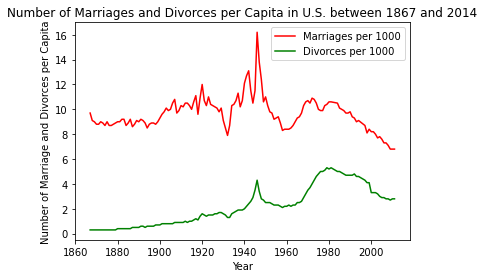

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_md = pd.read_csv("us-marriages-divorces-1867-2014.csv")

marraige_line_label = sns.lineplot(data=data_md, x="Year", y ='Marriages_per_1000',label = 'Marriages per 1000', color='red')
divorce_line_label = sns.lineplot(data=data_md, x="Year", y ='Divorces_per_1000',label = 'Divorces per 1000', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Marriage and Divorces per Capita')
plt.title("Number of Marriages and Divorces per Capita in U.S. between 1867 and 2014")
plt.legend()

# Question 7

Text(0.5, 1.0, 'Number of Marriages and Divorces per Capita in U.S. in 1900, 1950, and 2000')

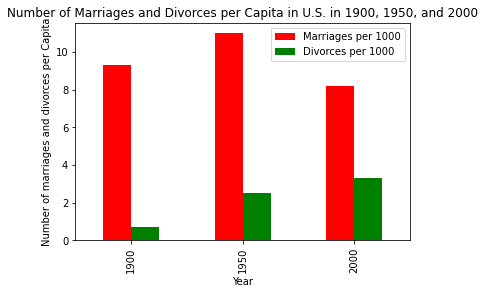

In [4]:

data_md = pd.read_csv("us-marriages-divorces-1867-2014.csv")

yearSet = data_md[(data_md['Year'] == 1900) | (data_md['Year']==1950) | (data_md['Year'] == 2000)]
yearSet.plot(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], kind="bar", label= ["Marriages per 1000", "Divorces per 1000"], color=["red","green"])

plt.xlabel('Year')
plt.ylabel('Number of marriages and divorces per Capita')
plt.title("Number of Marriages and Divorces per Capita in U.S. in 1900, 1950, and 2000")

# Question 8

Text(0.5, 1.0, 'Deadliest Actors in Hollywood')

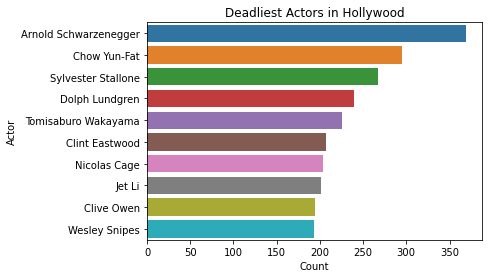

In [5]:
data_8 = pd.read_csv('actor_kill_counts.csv')
sns.barplot(x="Count", y="Actor", data=data_8.sort_values("Count", ascending=False))
plt.title('Deadliest Actors in Hollywood')

# Question 9

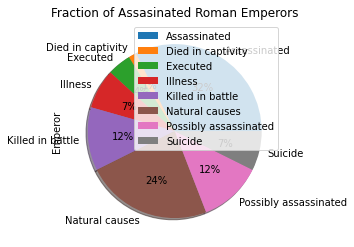

In [6]:
data_9 = pd.read_csv('roman-emperor-reigns.csv')

data_9.groupby(['Cause_of_Death']).count().plot(kind='pie', y='Emperor', autopct = '%1.0f%%', title = 'Fraction of Assasinated Roman Emperors', shadow=True,)
plt.show()

# Question 10

Text(0, 0.5, 'Computer Science Doctorates Awarded')

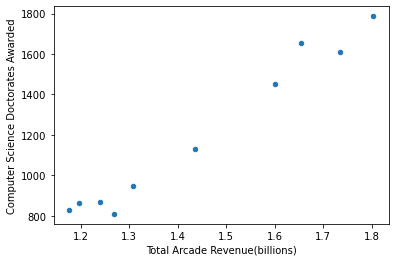

In [7]:
data_10 = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

data_10.plot.scatter(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)')

plt.xlabel('Total Arcade Revenue(billions)')
plt.ylabel('Computer Science Doctorates Awarded')